多任务Lasso允许拟合多元回归问题， 根据相同的任务共同执行特征选择。此示例模拟顺序测量，每个任务都是时间瞬间，相关特性随时间而变化。多任务的Lasso强制在一个时间点被选中的特征， 在所有时间点都被选中。这使得Lasso的特征选择更加稳定。

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

In [6]:
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
times


array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
       2.41660973, 2.57771705, 2.73882436, 2.89993168, 3.061039  ,
       3.22214631, 3.38325363, 3.54436094, 3.70546826, 3.86657557,
       4.02768289, 4.1887902 , 4.34989752, 4.51100484, 4.67211215,
       4.83321947, 4.99432678, 5.1554341 , 5.31654141, 5.47764873,
       5.63875604, 5.79986336, 5.96097068, 6.12207799, 6.28318531])

In [7]:
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

In [9]:
coef.shape

(40, 30)

In [10]:
X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

In [13]:
Y.shape

(100, 40)

In [14]:
coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

In [16]:
coef_lasso_

array([[-0.00000000e+00, -3.36347050e-01, -8.72288291e-02, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -4.83525976e-01, -3.18086554e-04, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -2.25525665e-01, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.57432719e-01,  5.14763892e-01, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.08187061e-02,  5.98206011e-01, -2.90736691e-01, ...,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.19606702e-01, -1.88942730e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]],
      shape=(40, 30))

In [17]:
coef_multi_task_lasso_

array([[-0.36689566, -0.64870018, -0.48725649, ..., -0.        ,
        -0.        , -0.        ],
       [-0.28578986, -0.76248975, -0.42867474, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.12359781, -0.54994442, -0.31829233, ..., -0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.51857103,  0.78488141, -0.15328409, ...,  0.        ,
         0.        , -0.        ],
       [ 0.47027982,  0.84901126, -0.62666168, ...,  0.        ,
        -0.        ,  0.        ],
       [ 0.31773425,  0.54886048, -0.5543684 , ..., -0.        ,
        -0.        , -0.        ]], shape=(40, 30))

Text(0.5, 0.98, 'Coefficient non-zero location')

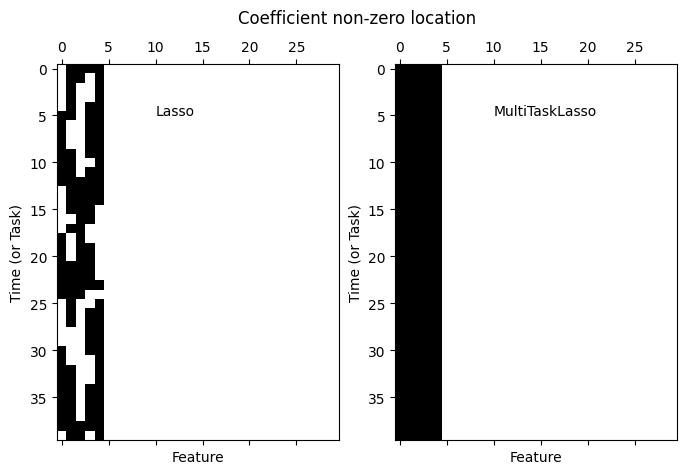

In [15]:
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

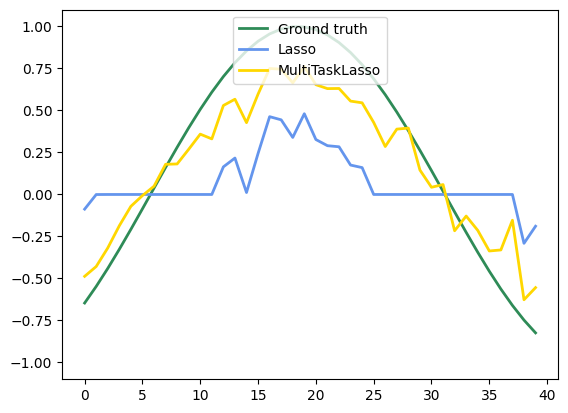

In [20]:
feature_to_plot = 2
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()